<a href="https://colab.research.google.com/github/jayV1999/Capstone-Project/blob/main/Copy_of_Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Global Terrorism Data.csv'
terror_attack_df = pd.read_csv(path,encoding="ISO-8859-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
terror_attack_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
terror_attack_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [6]:
terror_attack_df.describe(include='all')

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
count,1.816910e+05,181691.000000,181691.000000,181691.000000,9239,181691.000000,2220,181691.000000,181691,181691.000000,...,28289,115500,76933,43516,181691,181691.000000,181691.000000,181691.000000,181691.000000,25038
unique,NaN,NaN,NaN,NaN,2244,NaN,1859,NaN,205,NaN,...,15429,83988,62263,36090,26,NaN,NaN,NaN,NaN,14306
top,NaN,NaN,NaN,NaN,"September 18-24, 2016",NaN,8/4/1998,NaN,Iraq,NaN,...,Casualty numbers for this incident conflict ac...,Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...","Christopher Hewitt, ""Political Violence and Te...",START Primary Collection,NaN,NaN,NaN,NaN,"201612010023, 201612010024, 201612010025, 2016..."
freq,NaN,NaN,NaN,NaN,101,NaN,18,NaN,24636,NaN,...,1607,205,134,139,78002,NaN,NaN,NaN,NaN,80
mean,2.002705e+11,2002.638997,6.467277,15.505644,NaN,0.045346,NaN,131.968501,NaN,7.160938,...,NaN,NaN,NaN,NaN,NaN,-4.543731,-4.464398,0.090010,-3.945952,NaN
std,1.325957e+09,13.259430,3.388303,8.814045,NaN,0.208063,NaN,112.414535,NaN,2.933408,...,NaN,NaN,NaN,NaN,NaN,4.543547,4.637152,0.568457,4.691325,NaN
min,1.970000e+11,1970.000000,0.000000,0.000000,NaN,0.000000,NaN,4.000000,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,-9.000000,-9.000000,-9.000000,-9.000000,NaN
25%,1.991021e+11,1991.000000,4.000000,8.000000,NaN,0.000000,NaN,78.000000,NaN,5.000000,...,NaN,NaN,NaN,NaN,NaN,-9.000000,-9.000000,0.000000,-9.000000,NaN
50%,2.009022e+11,2009.000000,6.000000,15.000000,NaN,0.000000,NaN,98.000000,NaN,6.000000,...,NaN,NaN,NaN,NaN,NaN,-9.000000,-9.000000,0.000000,0.000000,NaN
75%,2.014081e+11,2014.000000,9.000000,23.000000,NaN,0.000000,NaN,160.000000,NaN,10.000000,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN


In [7]:
terror_attack_df_new = terror_attack_df.dropna(axis=1)

In [8]:
print(terror_attack_df_new['success'])

0         1
1         1
2         1
3         1
4         1
         ..
181686    1
181687    1
181688    1
181689    0
181690    0
Name: success, Length: 181691, dtype: int64


In [9]:
terror_attack_df_new.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,vicinity,...,gname,individual,weaptype1,weaptype1_txt,property,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,0,...,MANO-D,0,13,Unknown,0,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,0,...,23rd of September Communist League,0,13,Unknown,0,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,0,...,Unknown,0,13,Unknown,0,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,0,...,Unknown,0,6,Explosives,1,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,0,...,Unknown,0,8,Incendiary,1,PGIS,-9,-9,1,1


In [10]:
terror_attack_df_new.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
extended           0
country            0
country_txt        0
region             0
region_txt         0
vicinity           0
crit1              0
crit2              0
crit3              0
success            0
suicide            0
attacktype1        0
attacktype1_txt    0
targtype1          0
targtype1_txt      0
gname              0
individual         0
weaptype1          0
weaptype1_txt      0
property           0
dbsource           0
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
dtype: int64

In [11]:
list(terror_attack_df_new.columns)

['eventid',
 'iyear',
 'imonth',
 'iday',
 'extended',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'vicinity',
 'crit1',
 'crit2',
 'crit3',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'targtype1',
 'targtype1_txt',
 'gname',
 'individual',
 'weaptype1',
 'weaptype1_txt',
 'property',
 'dbsource',
 'INT_LOG',
 'INT_IDEO',
 'INT_MISC',
 'INT_ANY']

In [12]:

#Top 10 countries were the attacks happend the most 
#Top 10 countries in which the Death rate is high 
#in what ways did the death happen
#weapons used to carry out the attacks 
#the govt name of the countries that has got attacked 


In [78]:
corr_data = terror_attack_df_new.corr()

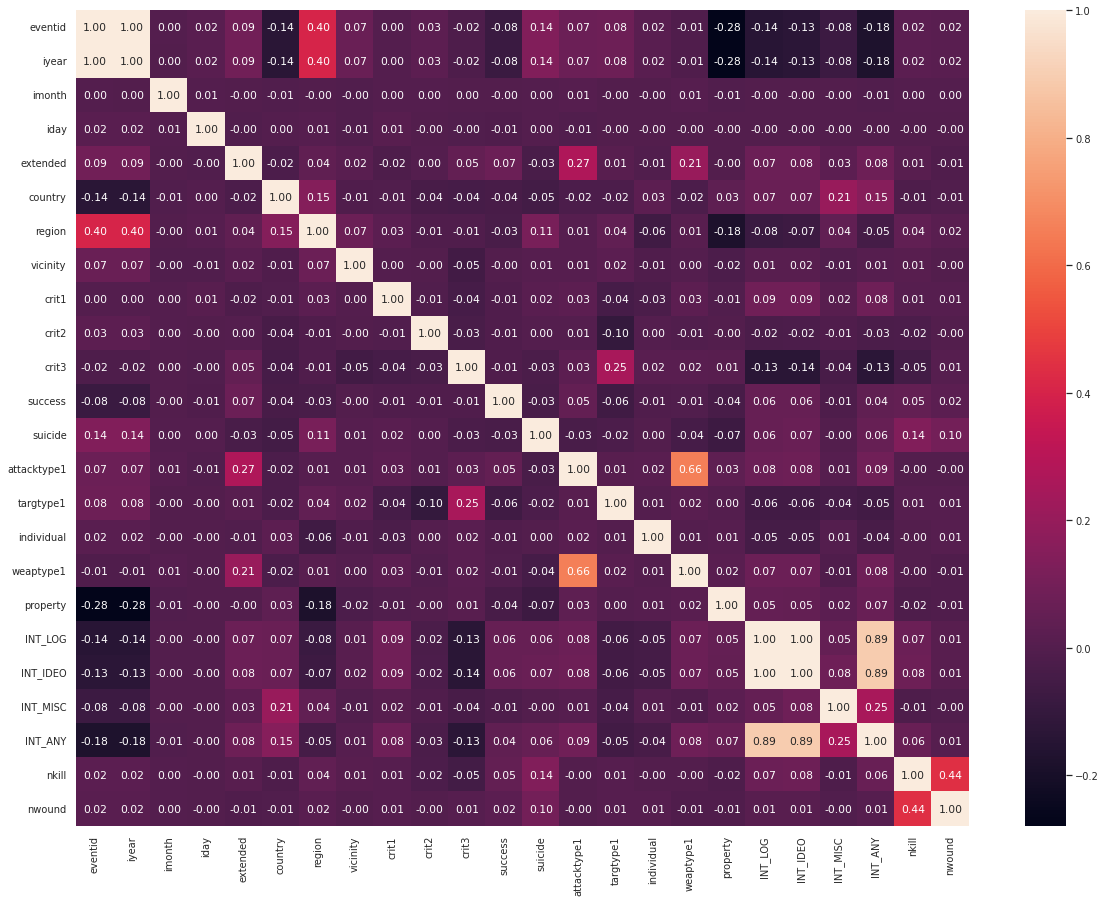

In [83]:
# extrtaction of heat map
plt.figure(figsize=(20,15))
sns.heatmap(corr_data,fmt='.2f',annot=True)


In [13]:
#The years in which the Attacks took place the most

terror_attack_df_new['iyear'].value_counts().reset_index().rename(columns={"index":"year","iyear": "no.of times"})

,year,no.of times
0,2014,16903
1,2015,14965
2,2016,13587
3,2013,12036
4,2017,10900
5,2012,8522
6,2011,5076
7,1992,5071
8,2010,4826
9,2008,4805


Text(0, 0.5, 'Number of Attacks')

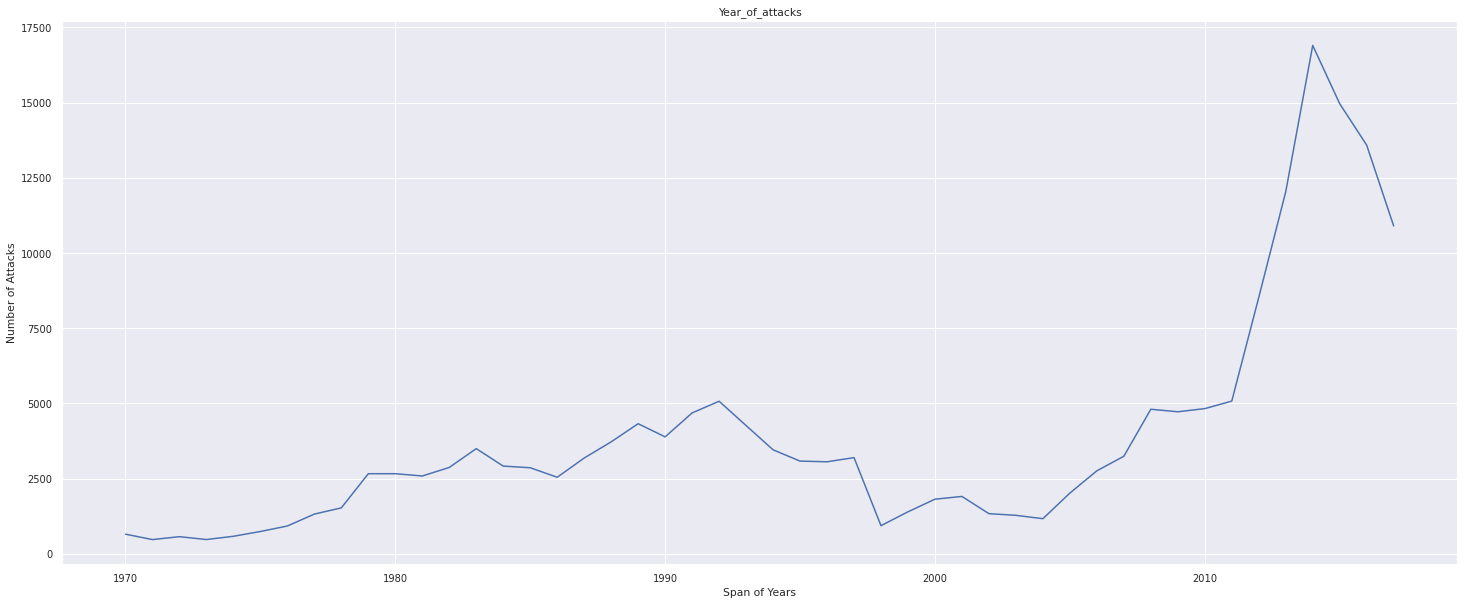

In [14]:
x_year = terror_attack_df_new['iyear'].unique()
y_count_years = terror_attack_df_new['iyear'].value_counts().sort_index()
plt.figure(figsize = (25,10))
sns.set(font_scale = 0.9)
sns.lineplot(x = x_year,y = y_count_years)
plt.title('Year_of_attacks')
plt.xlabel('Span of Years')
plt.ylabel('Number of Attacks')

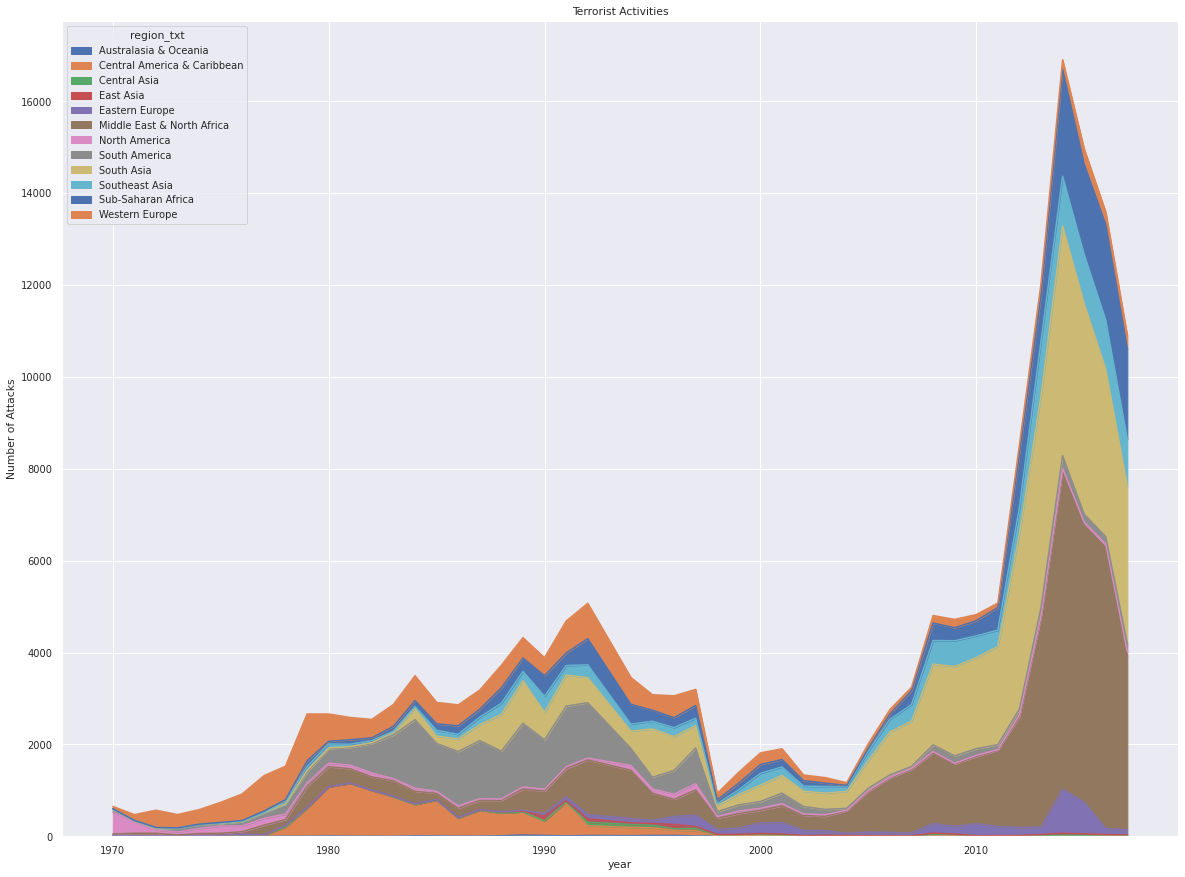

In [75]:
pd.crosstab(terror_attack_df_new.iyear,terror_attack_df_new.region_txt).plot(kind='area',figsize=(20,15))
plt.title('Terrorist Activities')
plt.ylabel('Number of Attacks')
plt.xlabel('year')
plt.show()

In [15]:
new_df = terror_attack_df_new['gname'].value_counts().reset_index().rename(columns={'index':'Organisation','gname':'No of Attacks'})[0:10]

In [16]:
new_df.head()

,Organisation,No of Attacks
0,Unknown,82782
1,Taliban,7478
2,Islamic State of Iraq and the Levant (ISIL),5613
3,Shining Path (SL),4555
4,Farabundo Marti National Liberation Front (FMLN),3351


Text(0, 0.5, 'Number of Attacks')

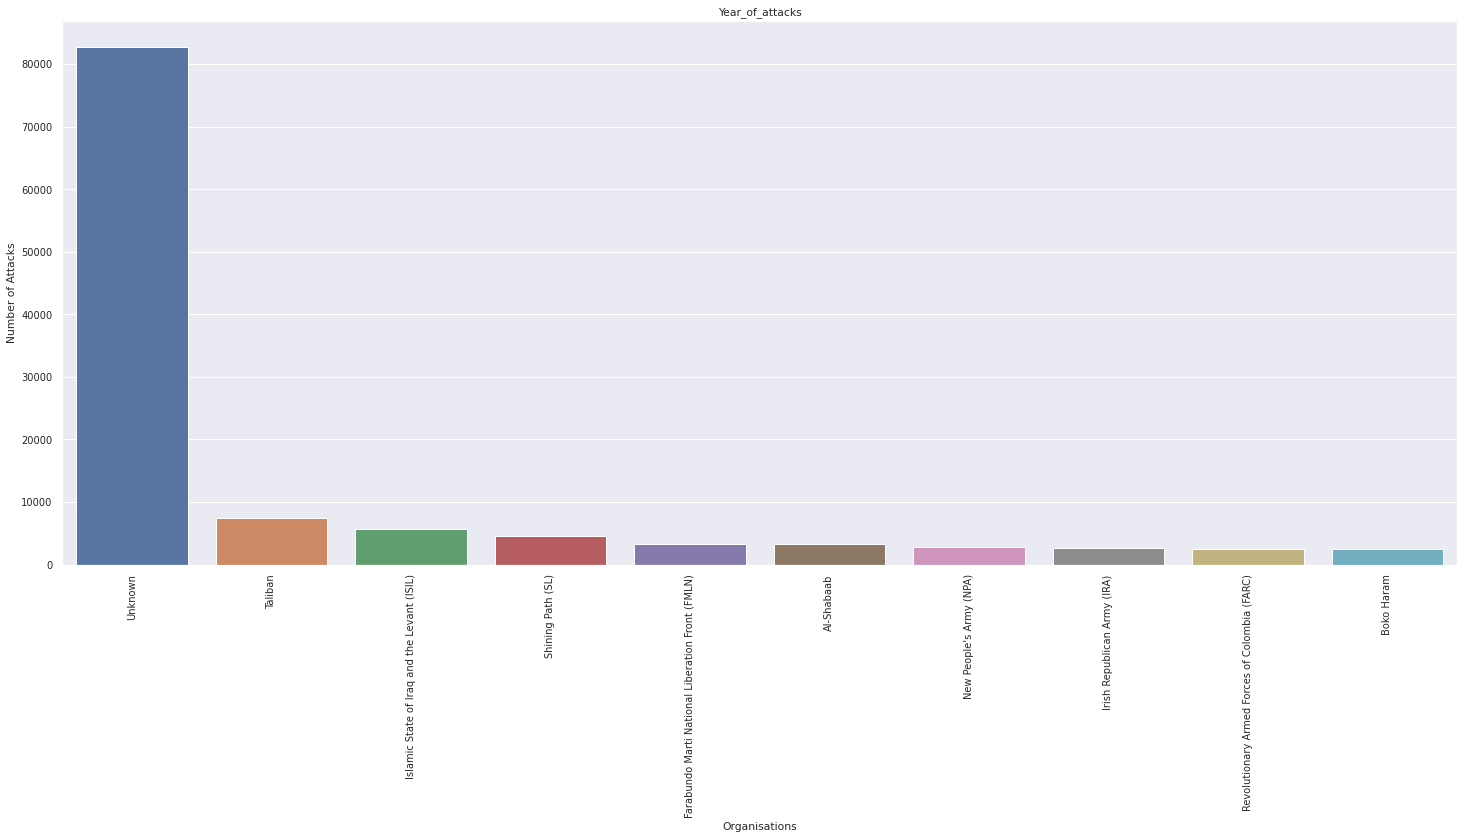

In [17]:


x_organisation = new_df['Organisation']
y_Number_Attacks = new_df['No of Attacks'].sort_index()
plt.figure(figsize = (25,10))
sns.set(font_scale = 0.9)
sns.barplot(x = x_organisation,y = y_Number_Attacks)
plt.title('Year_of_attacks')
plt.xlabel('Organisations')
plt.xticks(rotation=90)
plt.ylabel('Number of Attacks')

In [18]:
#Top 10 countries taliban has attacked

terror_attack_df_new[terror_attack_df_new['gname'] == 'Taliban'][0:10]['country_txt']

59040    Afghanistan
60014    Afghanistan
60462    Afghanistan
60786    Afghanistan
71682    Afghanistan
72776    Afghanistan
73116    Afghanistan
73184    Afghanistan
73971    Afghanistan
74043    Afghanistan
Name: country_txt, dtype: object

In [19]:
terror_attack_df_new.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'vicinity', 'crit1', 'crit2',
       'crit3', 'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'targtype1', 'targtype1_txt', 'gname', 'individual', 'weaptype1',
       'weaptype1_txt', 'property', 'dbsource', 'INT_LOG', 'INT_IDEO',
       'INT_MISC', 'INT_ANY'],
      dtype='object')

In [20]:
#Top 10 countries with most attacks
terror_attack_df_new['country_txt'].value_counts().reset_index().rename(columns={'index':'Countries','country_txt':'No of Attacks'})[0:10]

,Countries,No of Attacks
0,Iraq,24636
1,Pakistan,14368
2,Afghanistan,12731
3,India,11960
4,Colombia,8306
5,Philippines,6908
6,Peru,6096
7,El Salvador,5320
8,United Kingdom,5235
9,Turkey,4292


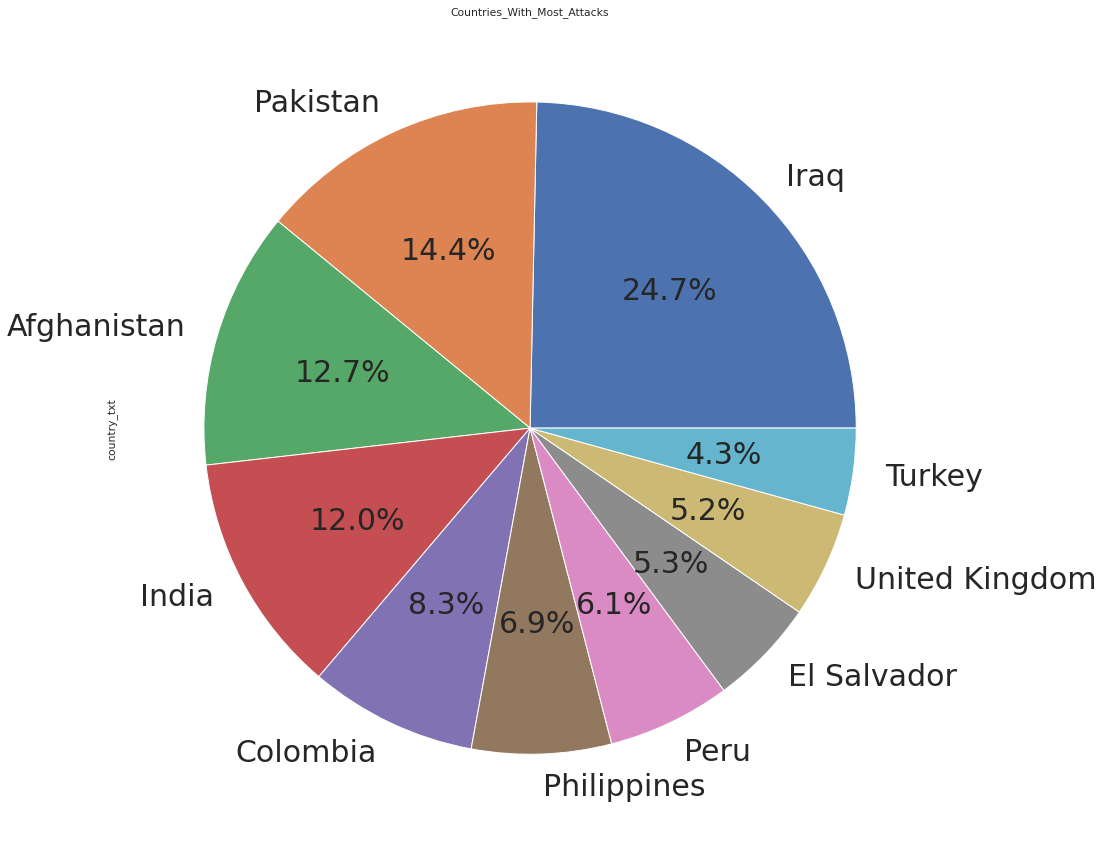

In [21]:
plt.figure(figsize=(15,15)) 
plt.title('Countries_With_Most_Attacks')
terror_attack_df_new['country_txt'].value_counts()[0:10].plot(kind='pie',autopct='%1.1f%%',textprops={'fontsize':30})

In [22]:
iraq_attack = terror_attack_df_new[terror_attack_df_new['country_txt'] == 'Iraq']
iraq_attack.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,vicinity,...,gname,individual,weaptype1,weaptype1_txt,property,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
2854,197503010002,1975,3,1,0,95,Iraq,10,Middle East & North Africa,0,...,Unknown,0,13,Unknown,0,Hijacking DB,-9,-9,0,-9
4385,197612150001,1976,12,15,0,95,Iraq,10,Middle East & North Africa,0,...,Unknown,0,6,Explosives,1,PGIS,-9,-9,0,-9
4393,197612180001,1976,12,18,1,95,Iraq,10,Middle East & North Africa,0,...,Kurdish Democratic Party-Iraq (KDP),0,13,Unknown,0,PGIS,0,1,1,1
4402,197612240001,1976,12,24,0,95,Iraq,10,Middle East & North Africa,0,...,Unknown,0,5,Firearms,0,PGIS,-9,-9,1,1
8688,197906150001,1979,6,15,0,95,Iraq,10,Middle East & North Africa,0,...,Unknown,0,13,Unknown,0,PGIS,-9,-9,0,-9


In [23]:
terror_attack_df['nkill']  = terror_attack_df['nkill'].fillna(0)
terror_attack_df['nwound']  = terror_attack_df['nwound'].fillna(0)
terror_attack_df['city']  = terror_attack_df['city'].fillna(0)


In [24]:
terror_attack_df_new['nkill'] = terror_attack_df['nkill']
terror_attack_df_new['nwound'] = terror_attack_df['nwound']
terror_attack_df_new['city'] = terror_attack_df['city']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [25]:
terror_attack_df_new.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,vicinity,...,weaptype1_txt,property,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,nkill,nwound,city
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,0,...,Unknown,0,PGIS,0,0,0,0,1.0,0.0,Santo Domingo
1,197000000002,1970,0,0,0,130,Mexico,1,North America,0,...,Unknown,0,PGIS,0,1,1,1,0.0,0.0,Mexico city
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,0,...,Unknown,0,PGIS,-9,-9,1,1,1.0,0.0,Unknown
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,0,...,Explosives,1,PGIS,-9,-9,1,1,0.0,0.0,Athens
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,0,...,Incendiary,1,PGIS,-9,-9,1,1,0.0,0.0,Fukouka


In [26]:
Country_wise_killed = terror_attack_df_new[['country_txt','nkill']].groupby('country_txt').sum().sort_values(by='nkill',ascending = False)
Region_wise_killed = terror_attack_df_new[['region_txt','nkill']].groupby('region_txt').sum().sort_values(by='nkill',ascending = False)

In [27]:
Country_wise_killed

,nkill
country_txt,
Iraq,78589.0
Afghanistan,39384.0
Pakistan,23822.0
Nigeria,22682.0
India,19341.0
...,...
St. Kitts and Nevis,0.0
Martinique,0.0
Brunei,0.0


In [28]:
Region_wise_killed

,nkill
region_txt,
Middle East & North Africa,137642.0
South Asia,101319.0
Sub-Saharan Africa,78386.0
South America,28849.0
Central America & Caribbean,28708.0
Southeast Asia,15637.0
Eastern Europe,7415.0
Western Europe,6694.0
North America,4916.0


In [29]:
Region_wise_Wounded = terror_attack_df_new[['region_txt','nwound']].groupby('region_txt').sum().sort_values(by='nwound',ascending = False)

In [30]:
Region_wise_Wounded

,nwound
region_txt,
Middle East & North Africa,214308.0
South Asia,141360.0
Sub-Saharan Africa,52857.0
Southeast Asia,26259.0
North America,21531.0
Western Europe,18332.0
South America,16704.0
Eastern Europe,12045.0
East Asia,9213.0


Text(0, 0.5, 'nwound')

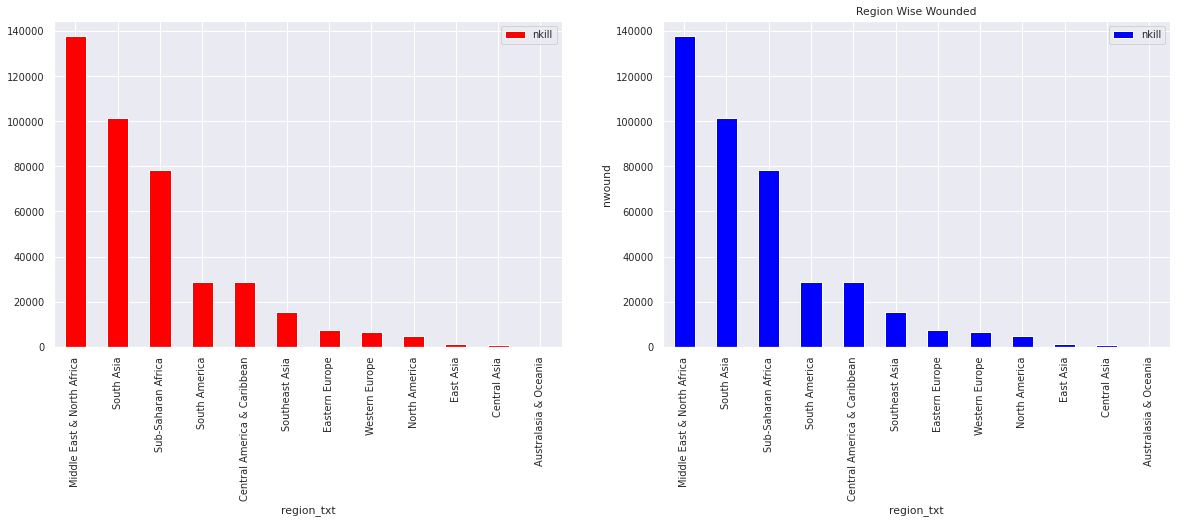

In [31]:
from IPython.core.pylabtools import figsize
figure = plt.figure()
ax0=figure.add_subplot(1,2,1)
ax1=figure.add_subplot(1,2,2)

#Graph for deaths in those regions
Region_wise_killed.plot(kind='bar',color='Red',figsize=(20,6),ax = ax0)
plt.title('Region Wise Deaths')
plt.xlabel('region_txt')
plt.ylabel('nkill')

#graph for wounded in those regions
Region_wise_killed.plot(kind='bar',color='Blue',figsize=(20,6),ax = ax1)
plt.title('Region Wise Wounded')
plt.xlabel('region_txt')
plt.ylabel('nwound')


In [32]:
  terror_attack_df_new.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,vicinity,...,weaptype1_txt,property,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,nkill,nwound,city
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,0,...,Unknown,0,PGIS,0,0,0,0,1.0,0.0,Santo Domingo
1,197000000002,1970,0,0,0,130,Mexico,1,North America,0,...,Unknown,0,PGIS,0,1,1,1,0.0,0.0,Mexico city
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,0,...,Unknown,0,PGIS,-9,-9,1,1,1.0,0.0,Unknown
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,0,...,Explosives,1,PGIS,-9,-9,1,1,0.0,0.0,Athens
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,0,...,Incendiary,1,PGIS,-9,-9,1,1,0.0,0.0,Fukouka


In [33]:
s = terror_attack_df_new.groupby(['gname','weaptype1_txt'])

In [34]:
s.first()

eventid  iyear  \
gname                                 weaptype1_txt                        
1 May                                 Explosives     198904100004   1989   
                                      Firearms       198901230001   1989   
14 K Triad                            Incendiary     199805080002   1998   
14 March Coalition                    Firearms       200807090025   2008   
14th of December Command              Explosives     199005140019   1990   
...                                                           ...    ...   
Zulu Miners                           Unknown        199405070003   1994   
Zuwar al-Imam Rida                    Firearms       201308100001   2013   
Zviadists                             Firearms       199802200003   1998   
Zwai Tribe                            Firearms       201312210005   2013   
leftist guerrillas-Bolivarian militia Firearms       199510290009   1995   

                                                     imonth  iday  extended  \
gname                                 weaptype1_txt                           
1 May                                 Explosives          4    10         0   
                                      Firearms            1    23         0   
14 K Triad                            Incendiary          5     8         0   
14 March Coalition                    Firearms            7     9         1   
14th of December Command              Explosives          5    14         0   
...                                                     ...   ...       ...   
Zulu Miners                           Unknown             5     7         0   
Zuwar al-Imam Rida                    Firearms            8     9         1   
Zviadists                             Firearms            2    20         1   
Zwai Tribe                            Firearms           12    21         1   
leftist guerrillas-Bolivarian militia Firearms           10    29         0   

                                                     country   country_txt  \
gname                                 weaptype1_txt                          
1 May                                 Explosives          78        Greece   
                                      Firearms            78        Greece   
14 K Triad                            Incendiary         117         Macau   
14 March Coalition                    Firearms           110       Lebanon   
14th of December Command              Explosives          43         Chile   
...                                                      ...           ...   
Zulu Miners                           Unknown            183  South Africa   
Zuwar al-Imam Rida                    Firearms           110       Lebanon   
Zviadists                             Firearms            74       Georgia   
Zwai Tribe                            Firearms           113         Libya   
leftist guerrillas-Bolivarian militia Firearms            45      Colombia   

                                                     region  \
gname                                 weaptype1_txt           
1 May                                 Explosives          8   
                                      Firearms            8   
14 K Triad                            Incendiary          4   
14 March Coalition                    Firearms           10   
14th of December Command              Explosives          3   
...                                                     ...   
Zulu Miners                           Unknown            11   
Zuwar al-Imam Rida                    Firearms           10   
Zviadists                             Firearms            7   
Zwai Tribe                            Firearms           10   
leftist guerrillas-Bolivarian militia Firearms            3   

                                                                     region_txt  \
gname                                 weaptype1_txt                               
1 May                                 Ex

In [63]:
# Highest Weapon type used in these attacks
print("Most Attack Types:",terror_attack_df_new['attacktype1_txt'].value_counts().idxmax())

Most_Attack_Types=terror_attack_df_new['attacktype1_txt'].value_counts().idxmax()


DeathRate_weaponType = terror_attack_df_new[['weaptype1_txt','nkill']].groupby('weaptype1_txt').sum().sort_values(by='nkill',ascending = False)
DeathRate_weaponType.reset_index().rename(columns={'weaptype1_txt':'Weapon Type','nkill':'People Killed'})

Most Attack Types: Bombing/Explosion


,Weapon Type,People Killed
0,Firearms,174894.0
1,Explosives,174277.0
2,Unknown,42620.0
3,Melee,10575.0
4,Incendiary,5476.0
5,Vehicle (not to include vehicle-borne explosiv...,3184.0
6,Chemical,624.0
7,Other,123.0
8,Sabotage Equipment,83.0
9,Biological,9.0


In [44]:
terror_attack_df_new.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'vicinity', 'crit1', 'crit2',
       'crit3', 'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'targtype1', 'targtype1_txt', 'gname', 'individual', 'weaptype1',
       'weaptype1_txt', 'property', 'dbsource', 'INT_LOG', 'INT_IDEO',
       'INT_MISC', 'INT_ANY', 'nkill', 'nwound', 'city'],
      dtype='object')

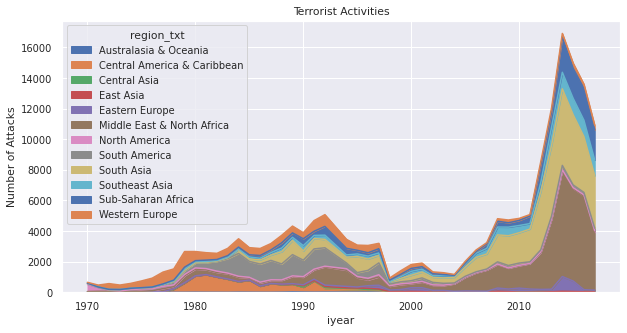

In [70]:
pd.crosstab(terror_attack_df_new.iyear,terror_attack_df_new.region_txt).plot(kind='area',figsize=(10,5))
plt.title('Terrorist Activities')
plt.ylabel('Number of Attacks')
plt.show()